In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r'airquality.csv')
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,high
1,2,36.0,118.0,8.0,72,5,2,medium
2,3,12.0,149.0,12.6,74,5,3,low
3,4,18.0,313.0,11.5,62,5,4,medium
4,5,NaN,NaN,14.3,56,5,5,low
...,...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26,low
149,150,NaN,145.0,13.2,77,9,27,NaN
150,151,14.0,191.0,14.3,75,9,28,low
151,152,18.0,131.0,8.0,76,9,29,NaN


In [4]:
df.shape

(153, 8)

In [5]:
df=df.drop(columns='Unnamed: 0')

In [6]:
df.isnull().sum()

Ozone       37
Solar.R      7
Wind         0
Temp         0
Month        0
Day          0
Humidity    72
dtype: int64

In [7]:
#Data Cleanning
df['Ozone']=df['Ozone'].fillna(df['Ozone'].mean())
df['Solar.R']=df['Solar.R'].fillna(df['Solar.R'].mean())
df['Humidity']=df['Humidity'].fillna(df['Humidity'].mode()[0])

In [8]:
df.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
Humidity    0
dtype: int64

In [9]:
# Data Integration
df_subset1=df[['Ozone','Temp']]

In [10]:
df_subset2=df[['Wind','Temp']]

In [11]:
integrated_data=pd.merge(df_subset1,df_subset2,on='Temp',how='inner')

In [12]:
integrated_data

,Ozone,Temp,Wind
0,41.0,67,7.4
1,41.0,67,12.0
2,41.0,67,16.1
3,41.0,67,13.8
4,23.0,67,7.4
...,...,...,...
796,23.0,71,10.9
797,23.0,71,11.5
798,23.0,71,9.2
799,14.0,63,16.6


In [13]:
# Data Transformation-lable encoding
from sklearn import preprocessing
df['Humidity']=preprocessing.LabelEncoder().fit_transform(df['Humidity'])
df['Humidity'].unique()

array([1, 3, 2, 0])

In [14]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,1
1,36.00000,118.000000,8.0,72,5,2,3
2,12.00000,149.000000,12.6,74,5,3,2
3,18.00000,313.000000,11.5,62,5,4,3
4,42.12931,185.931507,14.3,56,5,5,2
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,2
149,42.12931,145.000000,13.2,77,9,27,2
150,14.00000,191.000000,14.3,75,9,28,2
151,18.00000,131.000000,8.0,76,9,29,2


In [15]:
# Model building

In [16]:
from sklearn.linear_model import LinearRegression
x=df[['Ozone']]
y=df[['Wind']]
model=LinearRegression().fit(x,y)
model

LinearRegression()

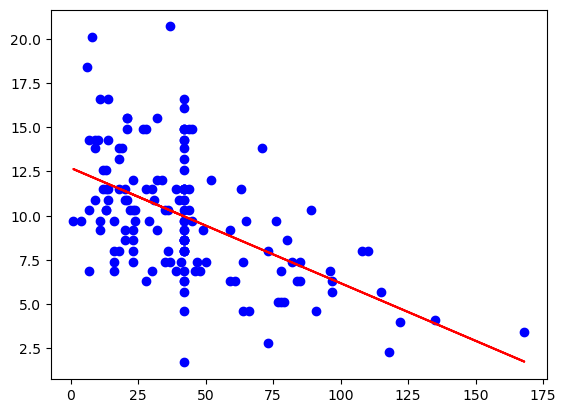

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='blue')
plt.plot(x,model.predict(x),color='red')
plt.show()